## Fisicoquimica ##

La fisicoquímica es la rama de la química que estudia los principios fundamentales de la química.
Esta constituida por varias ramas: 

1. Termodinámica química y el equilibrio. 
2. La cinética química, 
3. la termodinámica estadística 
4. la química cuantica.

En este curso estudiaremos la primera parte de la físicoquímica relativa a las *termodinámica química*. Empezaremos con el tema muy importante de las ecuaciones de estado. En este caso un **gas** se caracteriza por:

- no poseer volumen definido, 
- ocupar todo el espacio disponible,
- adopta la forma del recipiente que lo contiene.

En cambio el estado **líquido** 
- tiene volumen definido, 
- pero adopta la forma del recipente que lo contiene. 

El estado **sólido** por otro lado forma y volumen definido. Estas definiciones son puramente macroscópicas y empíricas.


El estado gaseoso es por mucho, el más fácil de estudiar y el que ha recibido el mejor tratamiento matemático. Empezaremos por una simulación de los gases ideales que se presenta a continuación.

In [1]:
from IPython.display import IFrame
IFrame('https://phet.colorado.edu/sims/html/gases-intro/latest/gases-intro_es.html',800,600)


Ahora vamos a tomar datos de la simulación anterior y realizar una análisis cuantitativo del comportamiento de los gases ideales. Usaremos el siguiente codigo para introducir los datos de anchura y presión.

In [2]:
#
# Para tomar los datos usamos la función input para que el usuario los introduzca, y despues los separamos 
# y los transformamos en datos numéricos con punto flotante
P = [float(x) for x in input("Dame los valores de presión, separados por comas\n").split(',')] 

V = [float(y) for y in input("Dame los valores de volumen, separados por comas\n").split(',')] 
print("\nLos valores introducidos de volumen, V= ", V)
print("\nLos valores introducidos de presión son, P= ", P)

Dame los valores de presión, separados por comas
16.2,10.8,13.0,18.1,23.1
Dame los valores de volumen, separados por comas
10.0,15.0,12.5,9.0,7.0

Los valores introducidos de volumen, V=  [10.0, 15.0, 12.5, 9.0, 7.0]

Los valores introducidos de presión son, P=  [16.2, 10.8, 13.0, 18.1, 23.1]


Ahora vamos a usar la libreria matplotlib para graficar la información

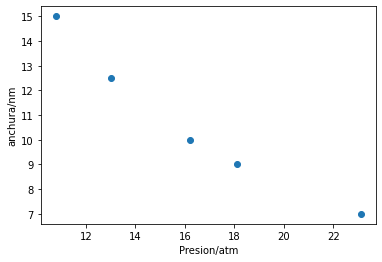

In [4]:
import matplotlib.pyplot as plt
plt.scatter(P,V)
plt.xlabel("Presion/atm")
plt.ylabel("anchura/nm")
plt.show()

## Modelo matemático para los datos

Ahora vamos a construir un modelo matemático para extraer un comportamiento general. Usaremos una técnica llamada ajuste por minimos cuadrados. Se puede decir en palabras que la anchura, la cual es proporcional al volumen, disminuye con la presión. Se dice que el volumen es inversamente proporcional a la presión. Matemáticamente esto se escribe así

$$ V \alpha \left(\frac{1}{P}\right) $$

Para quitar el simbolo de proporcionalidad, $\alpha$, introducimos una constante. Quedando la ecuación:

$$  V = \left(\frac{K}{P}\right)$$

El valor de la constante K lo podemos obtener por un ajuste no lineal de los datos.


### Codigo python para realizar el ajuste de los datos y establecer una ecuación para el comportamiento

Vamos a realizar un ajuste de los datos de presion y anchura que previamente realizamos. 

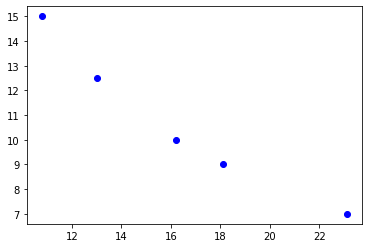

In [14]:
#primero importamos las liberias que requerimos
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
#definimos una función de ajuste de los datos
def func(x,a):
    return (a/x)
#convertimos en arreglos numéricos de numpy los datos experimentales introducidos
xdata=np.array(P)
ydata=np.array(V)

##graficamos los datos experimentales, solo para ver que todo este bien

plt.plot(xdata,ydata,'bo',label='datos experimentales')

In [17]:
#Realizamos el ajuste de la curva con la función de arriba
param_inicial=[2.0]
popt, pconv = curve_fit(func, xdata, ydata,param_inicial)
print("este es el valor de la constante K =", popt)

este es el valor de la constante K = [162.22144298]


<function matplotlib.pyplot.show(*args, **kw)>

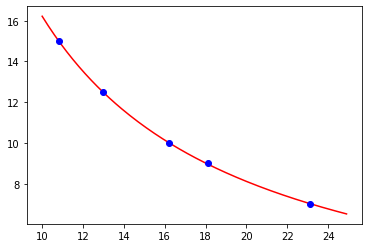

In [16]:
#ahora creamos los datos predichos por el modelo y los graficamos con el 
xfit=np.arange(10,25,0.1)
# aqui graficamos
plt.plot(xfit,func(xfit,*popt), 'r')
plt.plot(xdata,ydata,'bo',label='datos experimentales')
plt.xlabel('presión/atm')
plt.ylabel('anchura/nm')
plt.show


### Conclusión

a temperatura constante el volumen se reduce conforme la presión aumenta siguiendo una ecuación (Ley de Boyle), para este caso específico:

$$  V = \left(\frac{162.22144298}{P}\right)$$

